![example](images/director_shot.jpeg)

# Microsoft Studios Pitch

**Authors:** Brett Zimmerman, Sanjit Varma, Douglas Lu, Tony Bai
***

## Overview

Microsoft is attempting to break into original content film making by creating a new movie studio. Using data from online movie resource websites such as Rotten Tomatoes and IMDB, our group analyzed historical data (focusing on "financial success") and its relationship compared to time of release, genres and film length to provide insights that can help guide Microsoft Studios in their new venture to become an industry leader down the road.

## Business Problem

To help Microsoft produce a successful movie, box office films were used to find insights on what makes a film successful. Using these insights discovered through data exploration, we are to formulate three actionable recommendations for Microsoft Studios that will act as a guide in the studio's decision-making on what type of film to produce


## Assumptions
* We have defined Financial Success as Profits being greater than 1.5x the budget. We concluded that for its first film, if Microsoft Studios profits around 1.5x the budget, investors will be paid back in full with possibly some interest. After marketing fees and variable compensation to actors, that would still leave some profit for Microsoft Studios.


## Data Understanding

* The Data used in this project includes data on movie actors, budget and worldwide/domestic gross figures. The data set come from online movie database such as IMDB, The Numbers and The Movie DB
* Our analysis will focus on movies from 2010-2019
* We intend to explore, seasonality/release month, genres and film length and how it compares to the success rate of a movie
***

In [110]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

%matplotlib inline

In [111]:
# Here you run your code to explore the data
dfbom = pd.read_csv('data/zippeddata/bom.movie_gross.csv')

df_imdb_name = pd.read_csv('data/zippeddata/imdb.name.basics.csv')

df_imdb_titleb = pd.read_csv('data/zippeddata/imdb.title.basics.csv')

df_imdb_title = pd.read_csv('data/zippeddata/imdb.title.crew.csv')

df_imdb_principals = pd.read_csv('data/zippeddata/imdb.title.principals.csv')

df_imdb_ratings = pd.read_csv('data/zippeddata/imdb.title.ratings.csv')

tsv_file='data/zippeddata/rt.movie_info.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('rt.movie_info.csv',index=False)
df_rt_movie = pd.read_csv('rt.movie_info.csv')

tsv_file='data/zippeddata/rt.reviews.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('rt.reviews.csv',index=False)
df_rt_review = pd.read_csv('rt.reviews.csv')

df_tmdb_movies = pd.read_csv('data/zippeddata/tmdb.movies.csv')

df_budget = pd.read_csv('data/zippeddata/tn.movie_budgets.csv')





In [112]:
df_list = [dfbom, df_imdb_name, df_imdb_titleb, df_imdb_title, df_rt_review, 
        df_imdb_principals, df_imdb_ratings, df_tmdb_movies, df_budget, df_rt_movie]

for df in df_list:
        display(df.head())

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [113]:
for df in df_list:
        display(df.shape)

(3387, 5)

(606648, 6)

(146144, 6)

(146144, 3)

(54432, 8)

(1028186, 6)

(73856, 3)

(26517, 10)

(5782, 6)

(1560, 12)

# Selecting the Datasets
After carefully analyzing the data sets, we decided to select The Numbers Movie Budget CSV and the IMDB movies title basics CSV files. These files contained information that would be useful to our recommendations. Important information included, movie titles, budgets, movie length and genres.

In [114]:
df_imdb_titleb.info()
#data sets seems to need some cleaning but doesnt seem to have too many nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [115]:
df_budget.info()
# need to convert interger values from their current object types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Preparation/Cleaning
***
The majority of the cleaning was done here but as you continue in this notebook, additional cleaning steps were taken as we found more areas that the data could be enhanced through further cleaning


In [116]:

# cleaned the tdmb Budget data set
# converted the last 3 col to float and removed the $

df_budget[df_budget.columns[3:6]] = df_budget[df_budget.columns[3:6]].replace('[\$,]', '', 
                                                                              regex=True).astype(float)

# created another row to determine wether the film grossed a profit
df_budget['profit'] = df_budget['worldwide_gross']- df_budget['production_budget']

# created a row of booleans returning True if profit exceeds 1.5 production budget
df_budget['fin_success'] =  (df_budget['profit'] > df_budget['production_budget']*1.5)




#combined data frame from budget and imdb title to obtain a combined table with genre 
df_budget_genre = df_budget.merge(df_imdb_titleb, 
                                  left_on='movie', 
                                  right_on='primary_title') 

#clean the genres into rows so they can be categorized easier
df_budget_genre['genres'] = df_budget_genre['genres'].str.strip().str.split(',')
single_genre = df_budget_genre.explode('genres')


# created another DF combining the single_genres into the budget
budget_genre= df_budget.merge(single_genre, left_on='movie', right_on='primary_title')

#dropped unnecessary cols
budget_genre.drop(columns=['id_x','movie_x', 'id_y', 'release_date_y', 
                           'production_budget_y', 'domestic_gross_y', 'worldwide_gross_y', 
                           'profit_y', 'fin_success_y', 'tconst','primary_title', 
                           'original_title', 'start_year' ], inplace = True )


#created a col for release month
budget_genre['release_month'] = df_budget_genre['release_date'].map(lambda x : x[:3])

#created a col for release year
budget_genre['release_year'] = budget_genre['release_date_x'].map(lambda x : x[-4:]).astype(int)


#selected films between 2010- 2019
budget_genre = budget_genre.loc[(budget_genre['release_year'] > 2009) & (budget_genre['release_year'] < 2020)]

#dropped duplicates of films
budget_genre.drop_duplicates(subset=['movie_y','genres'],keep='first',inplace=True)


budget_genre.groupby('release_year')['genres'].count()



release_year
2010    515
2011    579
2012    539
2013    575
2014    631
2015    819
2016    548
2017    433
2018    370
2019    148
Name: genres, dtype: int64

We selected movies from 2010-2019 becasue the majority of the data point belonged inside this range and we wanted to remove the outliers. Our data set includes 5157 entries.

In [117]:
#finished table looks as such:

budget_genre.head()

,release_date_x,production_budget_x,domestic_gross_x,worldwide_gross_x,profit_x,fin_success_x,movie_y,runtime_minutes,genres,release_month,release_year
1,"May 20, 2011",410600000.0,241063875.0,1.045664e+09,635063875.0,True,Pirates of the Caribbean: On Stranger Tides,136.0,Action,May,2011
2,"May 20, 2011",410600000.0,241063875.0,1.045664e+09,635063875.0,True,Pirates of the Caribbean: On Stranger Tides,136.0,Adventure,Jun,2011
3,"May 20, 2011",410600000.0,241063875.0,1.045664e+09,635063875.0,True,Pirates of the Caribbean: On Stranger Tides,136.0,Fantasy,May,2011
4,"Jun 7, 2019",350000000.0,42762350.0,1.497624e+08,-200237650.0,False,Dark Phoenix,113.0,Action,Apr,2019
5,"Jun 7, 2019",350000000.0,42762350.0,1.497624e+08,-200237650.0,False,Dark Phoenix,113.0,Adventure,Nov,2019


## First Recommendation exploration 
As a group we decided to look at the runtime of movies and wether that had an effect on the success rate of a movie. We decided to classify movie's length into three baskets :<b>"Long"</b> , <b>"Short"</b> and <b>"Medium"</b> Looking below the majority of movies fall between the distribution of 90-116 minutes however we decided to assume that a medium film would be all films between 90 and 150 minutes. Anything above would be considered <b>"Long"</b> ,and anything below would be considered <b>"Short"</b>. 

Using the three buckets we were able to plot the % of films in each "length" bucket that succeeded in terms of financial success as we have defined.

In [131]:
#needed to recreate a table due to the previous having same movie title listed as many times as its genres
df_runtime= df_budget.merge(df_imdb_titleb, left_on='movie', right_on='primary_title') 


df_runtime.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,fin_success,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,True,tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,True,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,False,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,True,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,True,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"


<ipython-input-132-3b45784cdf6d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_film_length['length'] = df_film_length['runtime_minutes'].map(lambda x :


<AxesSubplot:xlabel='runtime_minutes', ylabel='profit'>

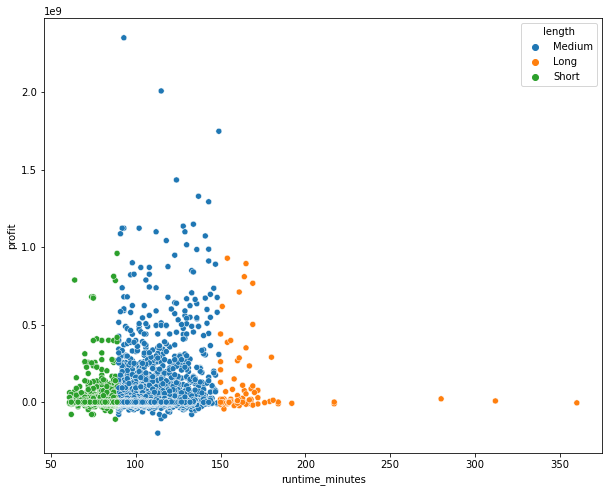

In [132]:
# analysis of run time vs success rate

#removed all movies under 1hr
df_film_length = df_runtime[df_runtime['runtime_minutes'] > 60]

#created new col to categorize film length
df_film_length['length'] = df_film_length['runtime_minutes'].map(lambda x : 
                                                                 'Short' if x < 90 
                                                                 else('Medium' if x < 150 else 'Long'))


#created dictionary of total films for each length
length_total = dict(df_film_length.groupby('length')['genres'].count())
#created dictionary of successful film for each length
length_success = dict(df_film_length[df_film_length['fin_success'] == True].groupby('length')['genres'].count())

#divided successful by total to obtain percentage
g1= length_success
g2= length_total
g3={x:float(g1[x])/g2[x] for x in g2}

#visualize the distribution of films on a Scatterplot
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_film_length, x="runtime_minutes", y="profit", hue="length", )


We can see the majority of the distribution is in the medium length

In [133]:
length_total

{'Long': 78, 'Medium': 2245, 'Short': 704}

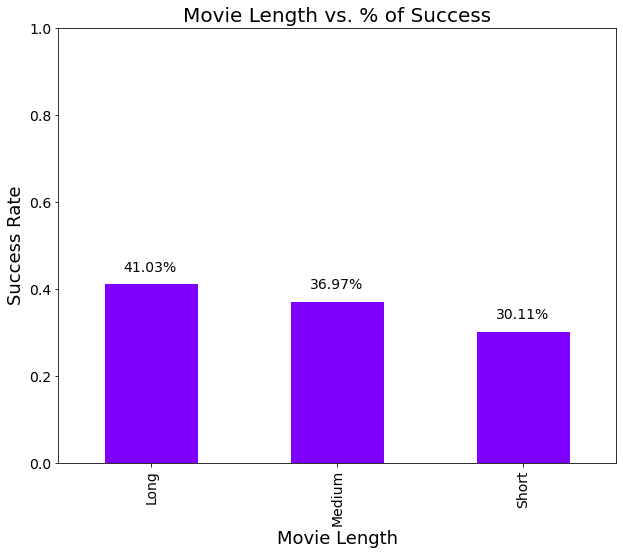

In [134]:
#plotting a graph for Movie Length vs Success

length_percent = pd.DataFrame.from_dict(g3, orient='index')


ax = length_percent.plot(kind='bar', figsize=(10, 8), fontsize=14, 
                         legend= False, colormap = 'rainbow', ylim=(0,1))

ax.set_title("Movie Length vs. % of Success", fontsize =20)
ax.set_ylabel('Success Rate', fontsize= 18)
ax.set_xlabel("Movie Length", fontsize=18)

for i in ax.patches:
    
    ax.text(i.get_x()+.1, i.get_height()+.03, \
            str(round((i.get_height())*100, 2))+'%', fontsize=14,
                color='black')
    


## Second Recommendation Exploration
***
For the second recommendation we are going to look at wether the time of release for a movie has any correlation with success rate.

We will start by looking at wether the season affects success rate


In [135]:
# reformat the release date col in order to use function
df_runtime['release_date'] = pd.to_datetime(df_runtime['release_date'])

#Function to convert month to season
def season_code_converter(month):
    season_code = month%12 // 3 + 1
    season_code_to_month = {1: 'Winter',
                            2: 'Spring',
                            3: 'Summer',
                            4: 'Fall'} 
    return season_code_to_month[season_code]

# new col for season
df_runtime['season'] = pd.DatetimeIndex(df_runtime['release_date']).month
for x in range(len(df_runtime)):
    df_runtime['season'].iloc[x] = (season_code_converter(df_runtime['release_date'].iloc[x].month))
    
df_runtime.head()


/Users/tbai/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,fin_success,tconst,primary_title,original_title,start_year,runtime_minutes,genres,season
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,True,tt1775309,Avatar,Abatâ,2011,93.0,Horror,Winter
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,True,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",Spring
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,False,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",Summer
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,True,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",Spring
4,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,True,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",Spring


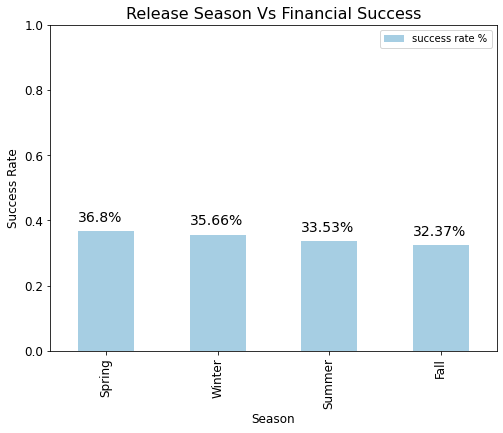

In [136]:
#visualizing the Success rate vs season 

#compile into a dictionary
season_success_total = dict(df_runtime[df_runtime['fin_success'] == True].groupby('season')['genres'].count())
season_total = dict(df_runtime.groupby('season')['genres'].count())
                   

s1= season_success_total
s2= season_total
s3={x:float(s1[x])/s2[x] for x in s2}


#visualization
season_percent = pd.DataFrame.from_dict(s3, orient= 'index')
season_percent.rename(columns = {season_percent.columns[0] : "success rate %"}, inplace=True)
x= season_percent.sort_values(by = "success rate %", ascending = False)

ax = x.plot(kind ='bar', fontsize= 12, colormap = 'Paired', figsize =(8, 6), ylim = (0, 1) )

ax.set_title("Release Season Vs Financial Success", fontsize = 16)
ax.set_ylabel('Success Rate', fontsize= 12)
ax.set_xlabel("Season", fontsize=12)

#annotation of bar graph
for i in ax.patches:
    
    ax.text(i.get_x(), i.get_height()+.03, \
            str(round((i.get_height())*100, 2))+'%', 
            fontsize=14, color='black')


### No Clear disctinction found !! So let's keep digging!
***
##### Let's look at the data month by month:

,# of Releases
Apr,345
Aug,300
Dec,494
Feb,262
Jan,234
Jul,252
Jun,310
Mar,331
May,248
Nov,286


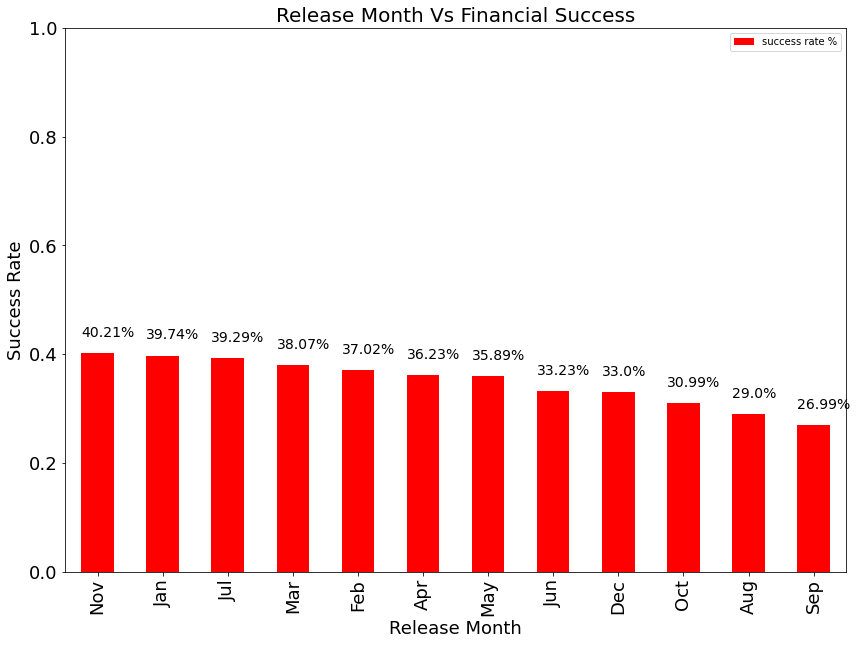

In [124]:
#cleaning slicing only the month from the data

df_runtime['release_month'] = df_runtime['release_date'].map(lambda x : x[:3])

#compiling the wins per month into a dictionary

month_success_total = dict(df_runtime[df_runtime['fin_success'] == True].groupby('release_month')['genres'].count())

month_total = dict(df_runtime.groupby('release_month')['genres'].count())
                   
m1= month_success_total
m2= month_total

m3={x:float(m1[x])/m2[x] for x in m2}

month_percent = pd.DataFrame.from_dict(m3, orient= 'index')


#rename the col

month_percent.rename(columns = {month_percent.columns[0] : "success rate %"}, inplace=True)
x= month_percent.sort_values(by = "success rate %", ascending = False)


ax = x.plot(kind ='bar', fontsize= 18, colormap = 'autumn', figsize =(14, 10), ylim = (0, 1) )

ax.set_title("Release Month Vs Financial Success", fontsize = 20)
ax.set_ylabel('Success Rate', fontsize= 18)
ax.set_xlabel("Release Month", fontsize=18)


#annotating the bar graph 

for i in ax.patches:
    
    ax.text(i.get_x(), i.get_height()+.03, \
            str(round((i.get_height())*100, 2))+'%', 
            fontsize=14, color='black')
    
#release month totals table

df_month_release_totals = pd.DataFrame.from_dict(m2, orient= 'index')

#rename col to count
df_month_release_totals.rename(columns = {df_month_release_totals.columns[0] : "# of Releases"}, inplace=True)

df_month_release_totals




### November is the month that is most likely to reach our goals followed by January
***


## Third Recommendation Exploration
***
After exploring release time and film length, let's get into the heart of a movie and that is its Genre

In [56]:
#genre exploration


budget_genre.groupby('genres')['genres'].count().sort_values(ascending= False) # sorted genres by data

genre_total= dict(budget_genre.groupby('genres')['genres'].count().sort_values(ascending= False))
genre_success_total= dict(budget_genre[budget_genre['fin_success_x'] == True].groupby('genres')['genres'].count().sort_values(ascending = False))


#delete news and reality tv form data set

del genre_total['News']
del genre_total['Reality-TV']

len(genre_total)






21

## Assumption
* It is important to note that here we are using a data frame where each movie is listed as many times as its genre. So for instance if a movie is Action/Adventure/Fantasy then it is counted in the basket of each of those Genres. Due to the limitation of this data set we have concluded to analyze the Genre this way. Although the data may be slightly skewed, one can argue that if a movie lost one of its Genres then that film would not be successful.

In [57]:

 
# return the percentages of success of each genre

d1= genre_success_total
d2= genre_total
d3={x:float(d1[x])/d2[x] for x in d2}

d3={k: v for k, v in sorted(d3.items(), key=lambda item: item[1])}



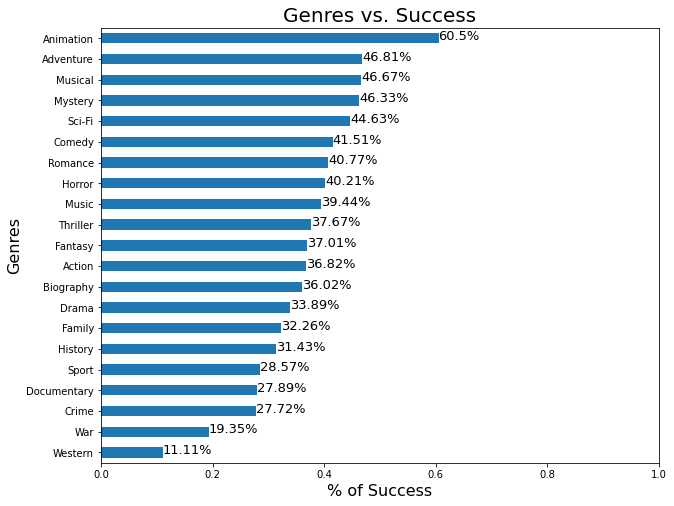

In [58]:
#convert dictionary to datafram per method
df_percentage = pd.DataFrame.from_dict(d3, orient= 'index')

ax = df_percentage.plot.barh(figsize =(10, 8), legend=False)
ax.set_title("Genres vs. Success", fontsize=20)
ax.set_ylabel('Genres', fontsize= 16)
ax.set_xlabel("% of Success", fontsize=16)
ax.set_xlim(0,1)




for i in ax.patches:
    
    ax.text(i.get_width(), i.get_y()+.18, \
            str(round((i.get_width())*100, 2)) +'%', fontsize=13, color='Black')


From the data it seems like the top 5 categories that are most likely to return 1.5x the production budget are <b>Animation <b/>, <b>Adventure <b/>, <b>Musical <b/>, <b>Mystery<b/> and <b>Sci-fi <b/> .

Let's dig deeper and find out more about the top successful genres and wether we can identify any trends. Now lets take a look at production budget in order to narrow our recommendation

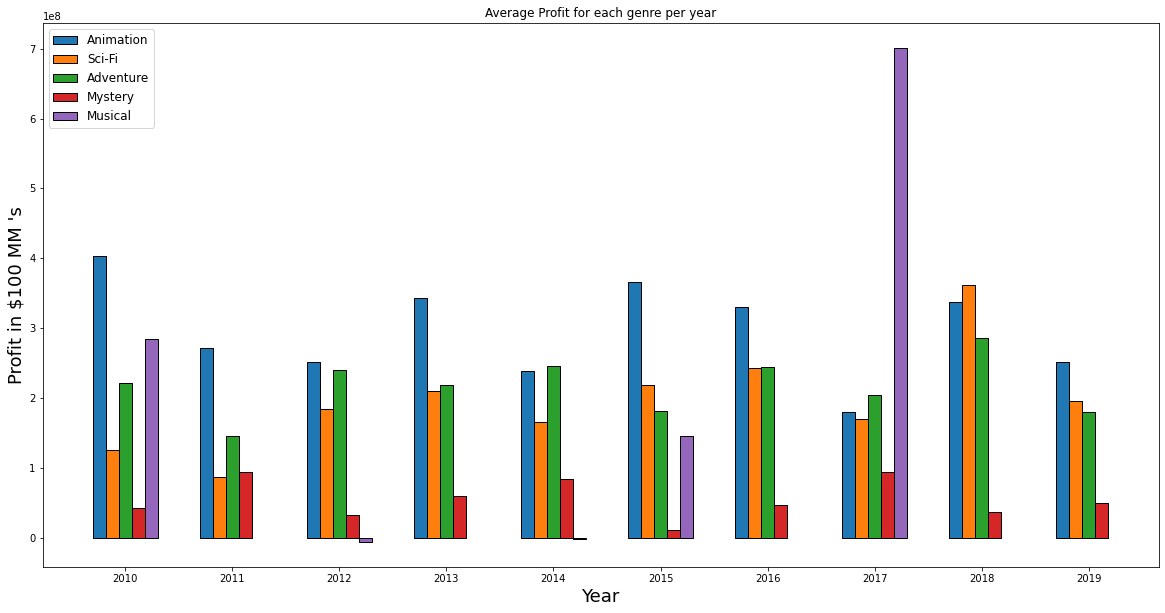

In [59]:
def genre_profit():
     
    #We only want to look at films in the last decade so we created a list of recent years only.
    recent_years_list=list(set(budget_genre[budget_genre['release_year']>2009]['release_year']))
    recent_years_exclude_2020s= [a for a in recent_years_list if a<2020]
    recent_years_exclude_2020s.sort()
    
    #Created genre_dict. Dictionary containing Genre names as keys and dictionaries as values. 
    #The inner dictionaries have years as keys and have the average profit in the respective year for films in the given genre.
    #The dataframe only includes medium length movies of a runtime between 90 and 150 minutes.

    def inner_dict(genre):
        get_dict= {}
        for a in recent_years_exclude_2020s:
            get_dict[a]=budget_genre[(budget_genre['genres']==genre) & 
                                     (budget_genre['release_year']==a) & 
                                     (budget_genre['runtime_minutes']>=90) & 
                                     (budget_genre['runtime_minutes']<=150)]['profit_x'].mean()
        return get_dict

    
    genre_dict={}
    for a in list(set(budget_genre['genres'])):
        genre_dict[a]= inner_dict(a)


    #Visualizing the genre_dict
    
    labels = [a for a in genre_dict['Animation'].keys()]
    animation_val= [a for a in genre_dict['Animation'].values()]
    fantasy_val= [a for a in genre_dict['Fantasy'].values()]
    adventure_val= [a for a in genre_dict['Adventure'].values()]
    action_val= [a for a in genre_dict['Action'].values()]
    comedy_val= [a for a in genre_dict['Comedy'].values()]
    musical_val= [a for a in genre_dict['Musical'].values()]
    scifi_val= [a for a in genre_dict['Sci-Fi'].values()]
    myst_val= [a for a in genre_dict['Mystery'].values()]

    x = np.arange(len(labels))
    width = 0.12
    
    y_range = range(0, 800000000, 100000000)
    y_ticks = [a for a in y_range]


    fig, ax = plt.subplots(figsize=(20,10))

    rects1= ax.bar(x - 2 * width , animation_val, width, label='Animation',edgecolor='black')
    rects2= ax.bar(x - width, scifi_val, width, label='Sci-Fi', edgecolor='black')
    rects3= ax.bar(x, adventure_val, width, label='Adventure', edgecolor='black')
    rects4= ax.bar(x + width, myst_val, width, label='Mystery', edgecolor='black')
    rects5= ax.bar(x + 2 * width , musical_val, width, label='Musical', edgecolor='black')


    ax.set_ylabel("Profit in $100 MM 's", fontsize = 18)
    ax.set_xlabel('Year', fontsize = 18)
    ax.set_title('Average Profit for each genre per year')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_yticks(y_ticks)
    ax.legend(fontsize = "large")
    

genre_profit()


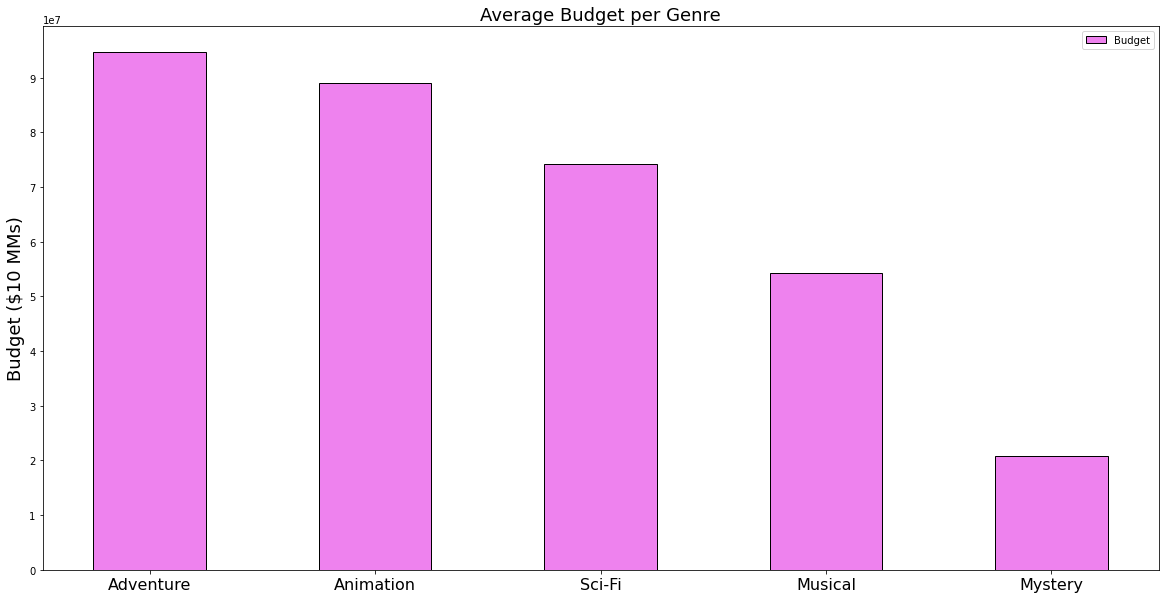

In [137]:
def genre_budget():
    
    #Create a dictionary named genre_budget_dict that has genres as keys and each genre's average budget as values.
    
    genre_budget_dict={}
    for a in list(set(budget_genre[(budget_genre['genres']=='Sci-Fi')|
                                   (budget_genre['genres']=='Mystery')|
                                   (budget_genre['genres']=='Animation')|
                                   (budget_genre['genres']=='Adventure')|
                                   (budget_genre['genres']=='Musical')]['genres'])):
        
        genre_budget_dict[a]= budget_genre[budget_genre['genres']==a]['production_budget_x'].mean()

    
    #Created list of tuples with each tuple consisting of a genre and its average genre budget. i.e. ('Action', budget)
    
    sort_genre_budget_dict = sorted(genre_budget_dict.items(),key = lambda x: x[1], reverse = True)


    
    #Creating the visualization
    
    x_values = [a[0] for a in sort_genre_budget_dict]

    y_values = [a[1] for a in sort_genre_budget_dict]

    y_range = range(0, 100000000, 10000000)
    y_ticks = [a for a in y_range]


    labels = x_values
    y = y_values

    x = np.arange(len(labels))
    width = 0.5


    fig, ax = plt.subplots(figsize=(20,10))

    rects1= ax.bar(x , y_values, width, label='Budget',edgecolor='black', color='violet')


    ax.set_ylabel('Budget ($10 MMs)', fontsize= 18)
    ax.set_title('Average Budget per Genre', fontsize= 18)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=16, color='black')
    ax.set_yticks(y_ticks)
   
    ax.legend()
    


    
genre_budget()



## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***